In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#reading the dataset
df= pd.read_csv("telecom_churn_data.csv")
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Exploratory Data Analysis 

In [3]:
df.shape

(99999, 226)

In [4]:
df.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

Since the number of  columns is high and all of them are not shown by default we need to use set_options.

In [5]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows" , 500)

##### Dealing with null values 

In [6]:
df.isnull().sum().sort_values(ascending= False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [7]:
round(((df.isnull().sum()/len(df))*100).sort_values(ascending= False),2)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

#### Removing all the columns that havee more than 70% null values present 

In [1]:
#removing the columns with more than 70% null values
df_clean= df.loc[:, (df.isnull().sum()/len(df)*100) <70]

NameError: name 'df' is not defined

In [9]:
df_clean.isnull().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou

In [10]:
df_clean.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [11]:
# After removing the columns with more than 70% of the null values
df_clean.shape

(99999, 186)

dropping the rows that have null values we can clearly see above that most of the time it is the same rows that have the missing value across the dataset so we will drop those values

In [12]:
df_clean.dropna(subset= ["loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8", "loc_ic_t2t_mou_9"],axis= 0, inplace= True)

D:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
df_clean.shape

(88327, 186)

In [14]:
df_clean.isna().sum()

mobile_number              0
circle_id                  0
loc_og_t2o_mou             0
std_og_t2o_mou             0
loc_ic_t2o_mou             0
last_date_of_month_6       0
last_date_of_month_7       0
last_date_of_month_8       0
last_date_of_month_9       0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
onnet_mou_9                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
offnet_mou_9               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_ic_mou_9              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
roam_og_mou_9              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2t_mou_9           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou

Eliminating the date columnns

In [15]:
df_clean.drop(["date_of_last_rech_6","date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"], axis= 1, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88327 entries, 1 to 99997
Columns: 182 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(4)
memory usage: 123.3+ MB


In [17]:
df_clean.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
onnet_mou_9             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
offnet_mou_9            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_ic_mou_9           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
roam_og_mou_9           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2t_mou_9        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2m_mou_9        0
loc_og_t2f_mou_6        0
loc_og_t2f_m

In [18]:
df_clean.shape

(88327, 182)

In [19]:
df_clean["Churn"]= np.where(df_clean["total_ic_mou_9"]+df_clean["vol_3g_mb_9"]+df_clean["vol_2g_mb_9"]+df_clean["total_og_mou_9"]>0, 0, 1)

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_10564/1524000892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Churn"]= np.where(df_clean["total_ic_mou_9"]+df_clean["vol_3g_mb_9"]+df_clean["vol_2g_mb_9"]+df_clean["total_og_mou_9"]>0, 0, 1)


In [20]:
df_clean.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   
5            9/30/2014   50.258   58.810   83.386  170.826        50.16   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   
5         14.46         46.91            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   
5           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   
5             50.16             43.63             85.48            138.79   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   
5             16.39              8.83             12.38             44.78   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              

In [21]:
df_clean["Churn"].sum()

2568

In [22]:
df_clean.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"], axis= 1, inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df_clean.shape

(88327, 179)

In [24]:
df_clean["aon"]

1        1006
2        1103
3        2491
4        1526
5        1471
         ... 
99991     256
99992    1168
99994    3199
99995    2052
99997     478
Name: aon, Length: 88327, dtype: int64

In [25]:
df_clean.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   
5   50.258   58.810   83.386  170.826        50.16        43.63        85.48   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   
5       138.79         19.28         13.44         14.46         46.91   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   
5            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   
5           0.00           0.00           0.00             50.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   
5             43.63             85.48            138.79             16.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   
5              8.83             12.38             44.78              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   
5              0.00              0.00              2.13               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00            

In [26]:
#filtering high value customers
np.percentile(df_clean["total_rech_amt_6"], 70)

390.0

In [27]:
np.percentile(df_clean["total_rech_amt_7"], 70)

390.0

In [28]:
np.percentile(df_clean["total_rech_amt_8"], 70)

400.0

In [29]:
np.percentile(df_clean["total_rech_amt_9"], 70)

386.0

In [30]:
(390+390+400+386)/4

391.5

In [31]:
rech_amt_70th_percentile=np.percentile(df_clean[["total_rech_amt_6","total_rech_amt_7", "total_rech_amt_8","total_rech_amt_9"]].mean(),70)

In [32]:
rech_amt_70th_percentile

340.2600076986652

In [33]:
avg_rech_amt_6_7_8_9= df_clean[["total_rech_amt_6","total_rech_amt_7", "total_rech_amt_8","total_rech_amt_9"]].mean(axis=1)

In [34]:
avg_rech_amt_6_7_8_9

1        215.50
2        239.25
3        387.75
4        258.25
5         95.00
          ...  
99991    172.50
99992    175.00
99994     55.00
99995    108.00
99997    579.25
Length: 88327, dtype: float64

In [35]:
high_val_cust_df= df_clean[avg_rech_amt_6_7_8_9> rech_amt_70th_percentile]

In [36]:
high_val_cust_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
3      7001204172        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
20     7001028254        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
24     7001125315        109             0.0             0.0             0.0   

     arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
3   221.338  251.102  508.054  389.500        99.91        54.39       310.98   
13  492.846  205.671  593.260  322.732       501.76       108.39       534.24   
20  271.699  421.474  364.251  241.434        72.41        86.73        71.18   
21  514.453  597.753  637.760  578.596       102.41       132.11        85.14   
24  422.050  359.730  354.793  473.030       124.19        55.19       141.11   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
3        241.71        123.31        109.01         71.68        113.54   
13       244.81        413.31        119.28        482.46        214.06   
20        56.24        198.84        225.38        132.51        237.58   
21       161.63        757.93        896.68        983.39        869.89   
24       138.04        450.33        370.48        283.36        481.86   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
3            0.00          54.86          44.38           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
20           0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
24           9.30           0.00          13.83           0.00           9.89   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
3           28.09          39.04           0.00             73.68   
13          35.26           1.44          12.78             49.63   
20           0.00           0.00           0.00             72.21   
21           0.00           0.00           0.00              4.48   
24           0.00          22.93           0.00             43.69   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
3              34.81             10.61             15.49            107.43   
13              6.19             36.01              6.14            151.13   
20             83.98             71.18             54.43            174.93   
21              6.16             23.34             29.98             91.81   
24             20.14              2.48             31.58            219.74   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
3              83.21             22.46             65.46              1.91   
13             47.28            294.46            108.24              4.54   
20            148.43             81.94            184.89              5.98   
21             87.93            104.81            107.54              0.75   
24            185.31             72.03            207.18             12.38   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
3               0.65              4.91              2.06              0.00   
13              0.00             23.51              5.29              0.00   
20             22.48             10.08             16.14              0.00   
21              0.00              1.58              0.00              0.00   
24             18.89             20.83             33.13              3.53   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
3                0.0              0.00              0.00        183.03   
13               0.0              0.49              0.00        205.31   
20               0.0              0.00              0.

In [37]:
high_val_cust_df.shape

(30777, 179)

In [38]:
high_val_cust_df.reset_index(inplace= True)

In [39]:
high_val_cust_df.drop("index", inplace = True , axis= 1)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
high_val_cust_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7001204172        109             0.0             0.0             0.0   
1     7002191713        109             0.0             0.0             0.0   
2     7001028254        109             0.0             0.0             0.0   
3     7002124215        109             0.0             0.0             0.0   
4     7001125315        109             0.0             0.0             0.0   

    arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
1  492.846  205.671  593.260  322.732       501.76       108.39       534.24   
2  271.699  421.474  364.251  241.434        72.41        86.73        71.18   
3  514.453  597.753  637.760  578.596       102.41       132.11        85.14   
4  422.050  359.730  354.793  473.030       124.19        55.19       141.11   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0       241.71        123.31        109.01         71.68        113.54   
1       244.81        413.31        119.28        482.46        214.06   
2        56.24        198.84        225.38        132.51        237.58   
3       161.63        757.93        896.68        983.39        869.89   
4       138.04        450.33        370.48        283.36        481.86   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0           0.00          54.86          44.38           0.00           0.00   
1          23.53         144.24          72.11         136.78           7.98   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           9.30           0.00          13.83           0.00           9.89   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0          28.09          39.04           0.00             73.68   
1          35.26           1.44          12.78             49.63   
2           0.00           0.00           0.00             72.21   
3           0.00           0.00           0.00              4.48   
4           0.00          22.93           0.00             43.69   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0             34.81             10.61             15.49            107.43   
1              6.19             36.01              6.14            151.13   
2             83.98             71.18             54.43            174.93   
3              6.16             23.34             29.98             91.81   
4             20.14              2.48             31.58            219.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0             83.21             22.46             65.46              1.91   
1             47.28            294.46            108.24              4.54   
2            148.43             81.94            184.89              5.98   
3             87.93            104.81            107.54              0.75   
4            185.31             72.03            207.18             12.38   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.65              4.91              2.06              0.00   
1              0.00             23.51              5.29              0.00   
2             22.48             10.08             16.14              0.00   
3              0.00              1.58              0.00              0.00   
4             18.89             20.83             33.13              3.53   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               0.0              0.00              0.00        183.03   
1               0.0              0.49              0.00        205.31   
2               0.0              0.00              0.00        253.13   
3               0.0            

In [41]:
high_val_cust_df.drop(["mobile_number", "circle_id"], axis= 1 , inplace = True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
print(high_val_cust_df.shape)
high_val_cust_df.head()

(30777, 177)


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  221.338  251.102  508.054   
1             0.0             0.0             0.0  492.846  205.671  593.260   
2             0.0             0.0             0.0  271.699  421.474  364.251   
3             0.0             0.0             0.0  514.453  597.753  637.760   
4             0.0             0.0             0.0  422.050  359.730  354.793   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0  389.500        99.91        54.39       310.98       241.71        123.31   
1  322.732       501.76       108.39       534.24       244.81        413.31   
2  241.434        72.41        86.73        71.18        56.24        198.84   
3  578.596       102.41       132.11        85.14       161.63        757.93   
4  473.030       124.19        55.19       141.11       138.04        450.33   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0        109.01         71.68        113.54           0.00          54.86   
1        119.28        482.46        214.06          23.53         144.24   
2        225.38        132.51        237.58           0.00           0.00   
3        896.68        983.39        869.89           0.00           0.00   
4        370.48        283.36        481.86           9.30           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          44.38           0.00           0.00          28.09          39.04   
1          72.11         136.78           7.98          35.26           1.44   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4          13.83           0.00           9.89           0.00          22.93   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00             73.68             34.81             10.61   
1          12.78             49.63              6.19             36.01   
2           0.00             72.21             83.98             71.18   
3           0.00              4.48              6.16             23.34   
4           0.00             43.69             20.14              2.48   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             15.49            107.43             83.21             22.46   
1              6.14            151.13             47.28            294.46   
2             54.43            174.93            148.43             81.94   
3             29.98             91.81             87.93            104.81   
4             31.58            219.74            185.31             72.03   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             65.46              1.91              0.65              4.91   
1            108.24              4.54              0.00             23.51   
2            184.89              5.98             22.48             10.08   
3            107.54              0.75              0.00              1.58   
4            207.18             12.38             18.89             20.83   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              2.06              0.00               0.0              0.00   
1              5.29              0.00               0.0              0.49   
2             16.14              0.00               0.0              0.00   
3              0.00              0.00               0.0              0.00   
4             33.13              3.53               0.0              3.15   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00        183.03        118.68         37.99         83.03   
1              0.00        205.31         53.48        353.99        119.69   
2              0.00       

In [43]:
#number of high value customers who churned
high_val_cust_df["Churn"].sum()

632

### Exploring some more 

<AxesSubplot:ylabel='Churn'>

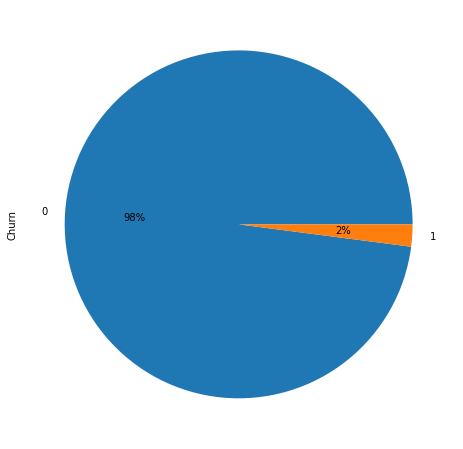

In [44]:
plt.rcParams["figure.figsize"]= (8,8)
high_val_cust_df["Churn"].value_counts().plot.pie(autopct = "%0.f%%")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_6'>

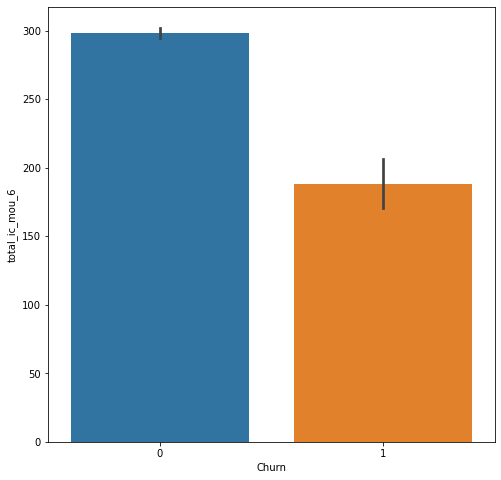

In [45]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_6")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_7'>

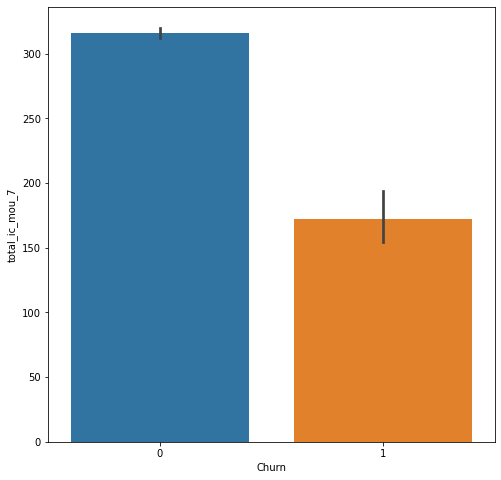

In [46]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_7")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_8'>

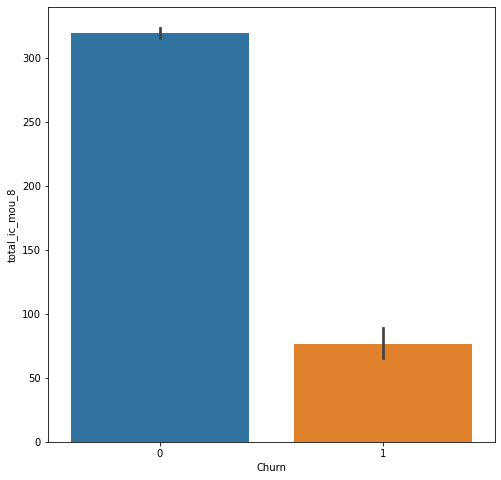

In [47]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_8")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_9'>

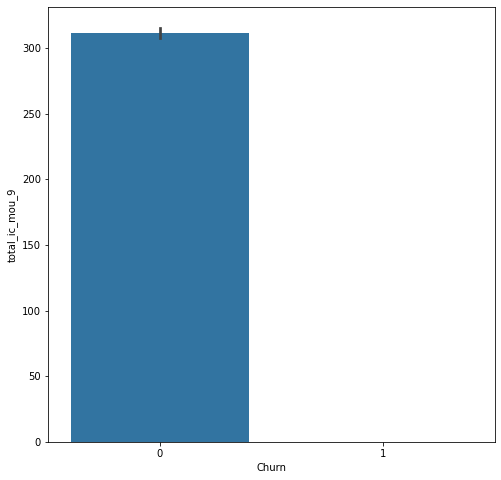

In [48]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_9")

<AxesSubplot:xlabel='Churn', ylabel='total_og_mou_6'>

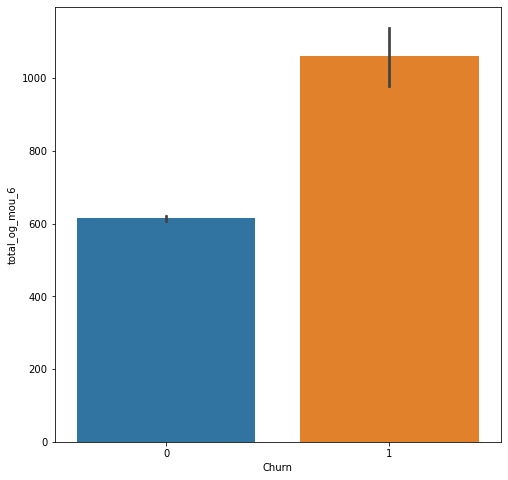

In [49]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_og_mou_6")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_7'>

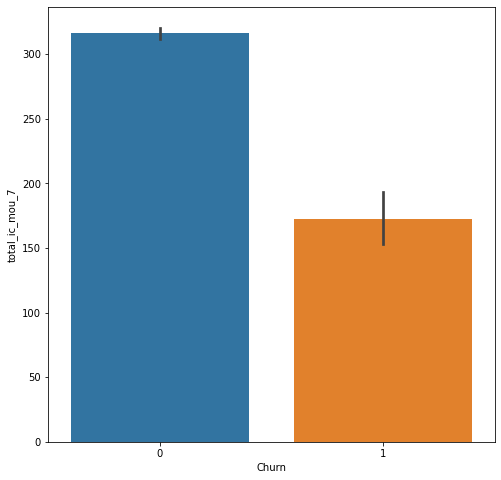

In [50]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_7")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_8'>

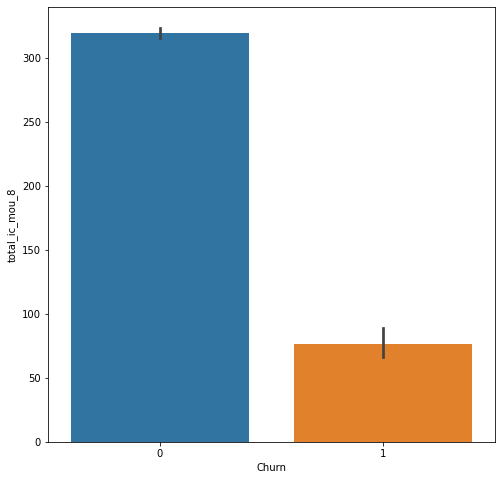

In [51]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_8")

<AxesSubplot:xlabel='Churn', ylabel='total_ic_mou_9'>

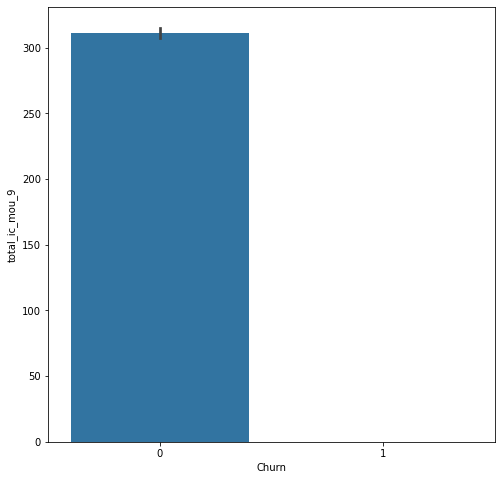

In [52]:
sns.barplot(data=high_val_cust_df, x= "Churn", y="total_ic_mou_9")

### Insights 
We can clearly see a decrease in the number of incoming and outgoing calls for the churnerss compared to the non churners this can be an important indication and can be used further to prevent churning

In [53]:
high_val_cust_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  221.338  251.102  508.054   
1             0.0             0.0             0.0  492.846  205.671  593.260   
2             0.0             0.0             0.0  271.699  421.474  364.251   
3             0.0             0.0             0.0  514.453  597.753  637.760   
4             0.0             0.0             0.0  422.050  359.730  354.793   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0  389.500        99.91        54.39       310.98       241.71        123.31   
1  322.732       501.76       108.39       534.24       244.81        413.31   
2  241.434        72.41        86.73        71.18        56.24        198.84   
3  578.596       102.41       132.11        85.14       161.63        757.93   
4  473.030       124.19        55.19       141.11       138.04        450.33   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0        109.01         71.68        113.54           0.00          54.86   
1        119.28        482.46        214.06          23.53         144.24   
2        225.38        132.51        237.58           0.00           0.00   
3        896.68        983.39        869.89           0.00           0.00   
4        370.48        283.36        481.86           9.30           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          44.38           0.00           0.00          28.09          39.04   
1          72.11         136.78           7.98          35.26           1.44   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4          13.83           0.00           9.89           0.00          22.93   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00             73.68             34.81             10.61   
1          12.78             49.63              6.19             36.01   
2           0.00             72.21             83.98             71.18   
3           0.00              4.48              6.16             23.34   
4           0.00             43.69             20.14              2.48   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             15.49            107.43             83.21             22.46   
1              6.14            151.13             47.28            294.46   
2             54.43            174.93            148.43             81.94   
3             29.98             91.81             87.93            104.81   
4             31.58            219.74            185.31             72.03   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             65.46              1.91              0.65              4.91   
1            108.24              4.54              0.00             23.51   
2            184.89              5.98             22.48             10.08   
3            107.54              0.75              0.00              1.58   
4            207.18             12.38             18.89             20.83   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              2.06              0.00               0.0              0.00   
1              5.29              0.00               0.0              0.49   
2             16.14              0.00               0.0              0.00   
3              0.00              0.00               0.0              0.00   
4             33.13              3.53               0.0              3.15   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0              0.00        183.03        118.68         37.99         83.03   
1              0.00        205.31         53.48        353.99        119.69   
2              0.00       

In [54]:
#deleting the columns with values from the 9th month 
columns_with_9= high_val_cust_df.columns[high_val_cust_df.columns.str.contains("_9")]

In [55]:
columns_with_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [56]:
len(columns_with_9)

42

In [57]:
#dropoing the columns that have the string "_9"
high_val_cust_df.drop(columns_with_9, axis= 1 , inplace= True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
high_val_cust_df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  221.338  251.102  508.054   
1             0.0             0.0             0.0  492.846  205.671  593.260   
2             0.0             0.0             0.0  271.699  421.474  364.251   
3             0.0             0.0             0.0  514.453  597.753  637.760   
4             0.0             0.0             0.0  422.050  359.730  354.793   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        99.91        54.39       310.98        123.31        109.01   
1       501.76       108.39       534.24        413.31        119.28   
2        72.41        86.73        71.18        198.84        225.38   
3       102.41       132.11        85.14        757.93        896.68   
4       124.19        55.19       141.11        450.33        370.48   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         71.68           0.00          54.86          44.38           0.00   
1        482.46          23.53         144.24          72.11           7.98   
2        132.51           0.00           0.00           0.00           0.00   
3        983.39           0.00           0.00           0.00           0.00   
4        283.36           9.30           0.00          13.83           9.89   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0          28.09          39.04             73.68             34.81   
1          35.26           1.44             49.63              6.19   
2           0.00           0.00             72.21             83.98   
3           0.00           0.00              4.48              6.16   
4           0.00          22.93             43.69             20.14   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             10.61            107.43             83.21             22.46   
1             36.01            151.13             47.28            294.46   
2             71.18            174.93            148.43             81.94   
3             23.34             91.81             87.93            104.81   
4              2.48            219.74            185.31             72.03   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              1.91              0.65              4.91              0.00   
1              4.54              0.00             23.51              0.00   
2              5.98             22.48             10.08              0.00   
3              0.75              0.00              1.58              0.00   
4             12.38             18.89             20.83              3.53   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0              0.00        183.03        118.68   
1               0.0              0.49        205.31         53.48   
2               0.0              0.00        253.13        254.89   
3               0.0              0.00         97.04         94.09   
4               0.0              3.15        275.83        224.36   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         37.99             26.23             14.89            289.58   
1        353.99            446.41             85.98            498.23   
2        163.21              0.20              2.74              0.00   
3        129.74             97.93            125.94             61.79   
4         95.34             79.83             35.04            126.61   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              2.99              1.73              6.53              0.00   
1            255.36             52.94            156.94              0.00   
2              5.86             21.86             23.18             12.06   
3            665.36            808.74            876.99              0.00   
4            198.41   

In [59]:
high_val_cust_df.shape

(30777, 135)

In [60]:
high_val_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Columns: 135 entries, loc_og_t2o_mou to Churn
dtypes: float64(109), int32(1), int64(25)
memory usage: 31.6 MB


In [61]:
high_val_cust_df.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         30777.0         30777.0         30777.0  30777.000000   
mean              0.0             0.0             0.0    536.633292   
std               0.0             0.0             0.0    428.617976   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    315.862000   
50%               0.0             0.0             0.0    452.916000   
75%               0.0             0.0             0.0    660.154000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  30777.000000  30777.000000  30777.000000  30777.000000  30777.000000   
mean     560.750034    570.664695    267.518321    290.099266    288.868992   
std      446.633758    461.535135    436.557420    463.705158    467.701897   
min    -2014.045000   -945.808000      0.000000      0.000000      0.000000   
25%      338.976000    346.739000     34.540000     39.280000     39.690000   
50%      466.778000    476.230000    109.590000    118.910000    118.480000   
75%      672.765000    677.816000    307.710000    338.830000    338.160000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  30777.000000  30777.000000  30777.000000   30777.000000   30777.000000   
mean     381.921962    406.134050    404.874044      16.360180      12.579404   
std      446.931425    467.996827    473.603053      72.854407      74.023500   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      116.910000    130.410000    130.160000       0.000000       0.000000   
50%      254.760000    268.960000    271.280000       0.000000       0.000000   
75%      479.710000    508.210000    510.230000       0.000000       0.000000   
max     8362.360000   9667.130000  14007.340000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   30777.000000   30777.000000   30777.000000   30777.000000   
mean       13.415354      27.121760      20.187281      21.592003   
std        74.973796     110.719026      93.227435     105.973477   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      30777.000000      30777.000000      30777.000000      30777.000000   
mean          89.837659         93.584617         92.606397        172.698545   
std          228.734664        242.783239        239.138152        241.940058   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.240000          9.290000          9.240000         27.140000   
50%           30.460000         32.810000         33.660000         95.780000   
75%           86.840000         89.390000         90.680000        228.280000   
max         6431.330000       7400.660000      10752.560000       4729.740000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      30777.000000      30777.000000      30777.000000      30777.000000   
mean         177.591791        178.686415          6.829759          7.054282   
std          233.876518        233.009345         20.726934         21.303563   
min            0.000000          0.000000          0.000000          0.000000   
25%           34.430000         33.690000          0.000000          0.000000   
50%          103.290000        105.030000          0.310000          0.480000   
75%   

In [62]:
X=high_val_cust_df.drop(["Churn"], axis= 1)

In [63]:
X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  221.338  251.102  508.054   
1             0.0             0.0             0.0  492.846  205.671  593.260   
2             0.0             0.0             0.0  271.699  421.474  364.251   
3             0.0             0.0             0.0  514.453  597.753  637.760   
4             0.0             0.0             0.0  422.050  359.730  354.793   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        99.91        54.39       310.98        123.31        109.01   
1       501.76       108.39       534.24        413.31        119.28   
2        72.41        86.73        71.18        198.84        225.38   
3       102.41       132.11        85.14        757.93        896.68   
4       124.19        55.19       141.11        450.33        370.48   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         71.68           0.00          54.86          44.38           0.00   
1        482.46          23.53         144.24          72.11           7.98   
2        132.51           0.00           0.00           0.00           0.00   
3        983.39           0.00           0.00           0.00           0.00   
4        283.36           9.30           0.00          13.83           9.89   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0          28.09          39.04             73.68             34.81   
1          35.26           1.44             49.63              6.19   
2           0.00           0.00             72.21             83.98   
3           0.00           0.00              4.48              6.16   
4           0.00          22.93             43.69             20.14   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             10.61            107.43             83.21             22.46   
1             36.01            151.13             47.28            294.46   
2             71.18            174.93            148.43             81.94   
3             23.34             91.81             87.93            104.81   
4              2.48            219.74            185.31             72.03   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0              1.91              0.65              4.91              0.00   
1              4.54              0.00             23.51              0.00   
2              5.98             22.48             10.08              0.00   
3              0.75              0.00              1.58              0.00   
4             12.38             18.89             20.83              3.53   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0              0.00        183.03        118.68   
1               0.0              0.49        205.31         53.48   
2               0.0              0.00        253.13        254.89   
3               0.0              0.00         97.04         94.09   
4               0.0              3.15        275.83        224.36   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         37.99             26.23             14.89            289.58   
1        353.99            446.41             85.98            498.23   
2        163.21              0.20              2.74              0.00   
3        129.74             97.93            125.94             61.79   
4         95.34             79.83             35.04            126.61   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              2.99              1.73              6.53              0.00   
1            255.36             52.94            156.94              0.00   
2              5.86             21.86             23.18             12.06   
3            665.36            808.74            876.99              0.00   
4            198.41   

In [64]:
y= high_val_cust_df["Churn"]

In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

In [66]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]> threshold):
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return(col_corr)


In [67]:
X.shape

(30777, 134)

<AxesSubplot:>

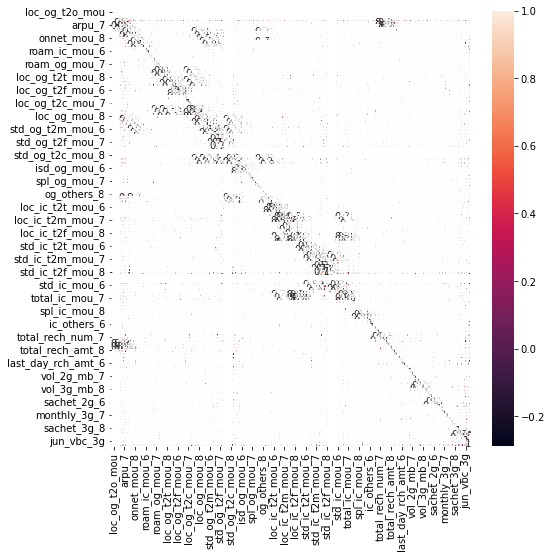

In [68]:
sns.heatmap(X.corr(), annot= True)

In [69]:
high_val_cust_df["aon"]

0        2491
1        2607
2        3108
3         720
4        3072
         ... 
30772    3054
30773    1689
30774    2696
30775     328
30776     478
Name: aon, Length: 30777, dtype: int64

In [70]:
high_val_cust_df["aon"].mean()

1299.9695226955193

In [71]:
df_clean["aon"].mean()

1276.0383687887056

### Removing the highly correlated variables 

In [72]:
highly_Correlated_features= correlation(X, 0.7)

In [73]:
len(highly_Correlated_features)

62

In [74]:
X= X.drop(highly_Correlated_features, axis= 1)

In [75]:
X.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  onnet_mou_6  \
0             0.0             0.0             0.0  221.338        99.91   
1             0.0             0.0             0.0  492.846       501.76   
2             0.0             0.0             0.0  271.699        72.41   
3             0.0             0.0             0.0  514.453       102.41   
4             0.0             0.0             0.0  422.050       124.19   

   offnet_mou_6  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0        123.31           0.00          54.86          44.38           0.00   
1        413.31          23.53         144.24          72.11           7.98   
2        198.84           0.00           0.00           0.00           0.00   
3        757.93           0.00           0.00           0.00           0.00   
4        450.33           9.30           0.00          13.83           9.89   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
0          28.09          39.04             73.68            107.43   
1          35.26           1.44             49.63            151.13   
2           0.00           0.00             72.21            174.93   
3           0.00           0.00              4.48             91.81   
4           0.00          22.93             43.69            219.74   

   loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              1.91              0.00               0.0              0.00   
1              4.54              0.00               0.0              0.49   
2              5.98              0.00               0.0              0.00   
3              0.75              0.00               0.0              0.00   
4             12.38              3.53               0.0              3.15   

   std_og_t2f_mou_6  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
0              0.00               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2             12.06               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4              0.00               0.0               0.0               0.0   

   isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.0         10.96           0.0         18.09          0.0   
1           0.0          0.00           0.0          4.78          0.0   
2           0.0          0.00           0.0          2.96          0.0   
3           0.0          0.00           0.0          0.00          0.0   
4           0.0         10.54           0.0         12.83          0.0   

   og_others_7  og_others_8  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
0          0.0          0.0             62.08            113.96   
1          0.0          0.0             67.88            142.88   
2          0.0          0.0             30.21             83.84   
3          0.0          0.0              2.48            118.23   
4          0.0          0.0             24.28            161.08   

   loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0             57.43             43.48              1.33              1.18   
1              4.81            115.68            308.13              0.00   
2             73.86              0.26              6.64              7.39   
3              4.61             14.06             67.69              0.00   
4             98.31             35.24             49.38             70.73   

   std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  spl_ic_mou_6  \
0               0.0               0.0               0.0          0.59   
1               0.0               0.0               0.0          0.45   
2               0.0               0.0               0.0          0.00   
3               0.0               0.0               0.0          0.00   
4               0.0               0.0           

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

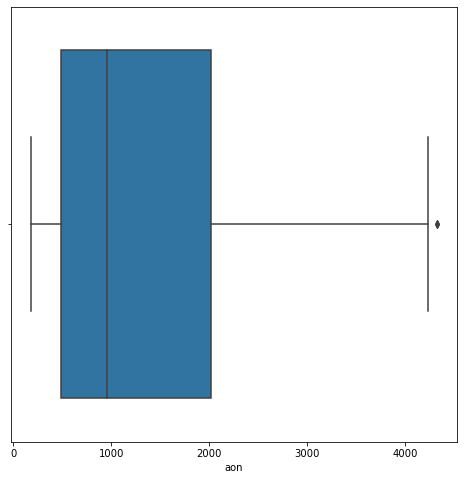

In [76]:
sns.boxplot(X["aon"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aon'>

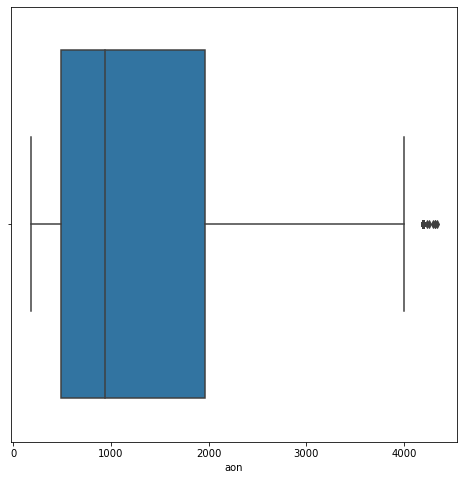

In [77]:
sns.boxplot(df_clean["aon"])

In [78]:
df_clean["aon"].describe()

count    88327.000000
mean      1276.038369
std        968.880403
min        180.000000
25%        484.000000
50%        936.000000
75%       1965.000000
max       4337.000000
Name: aon, dtype: float64

In [79]:
X["aon"].describe()

count    30777.000000
mean      1299.969523
std        984.176242
min        180.000000
25%        488.000000
50%        956.000000
75%       2013.000000
max       4321.000000
Name: aon, dtype: float64

In [80]:
X.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_

In [81]:
len(X.columns)

72

<AxesSubplot:>

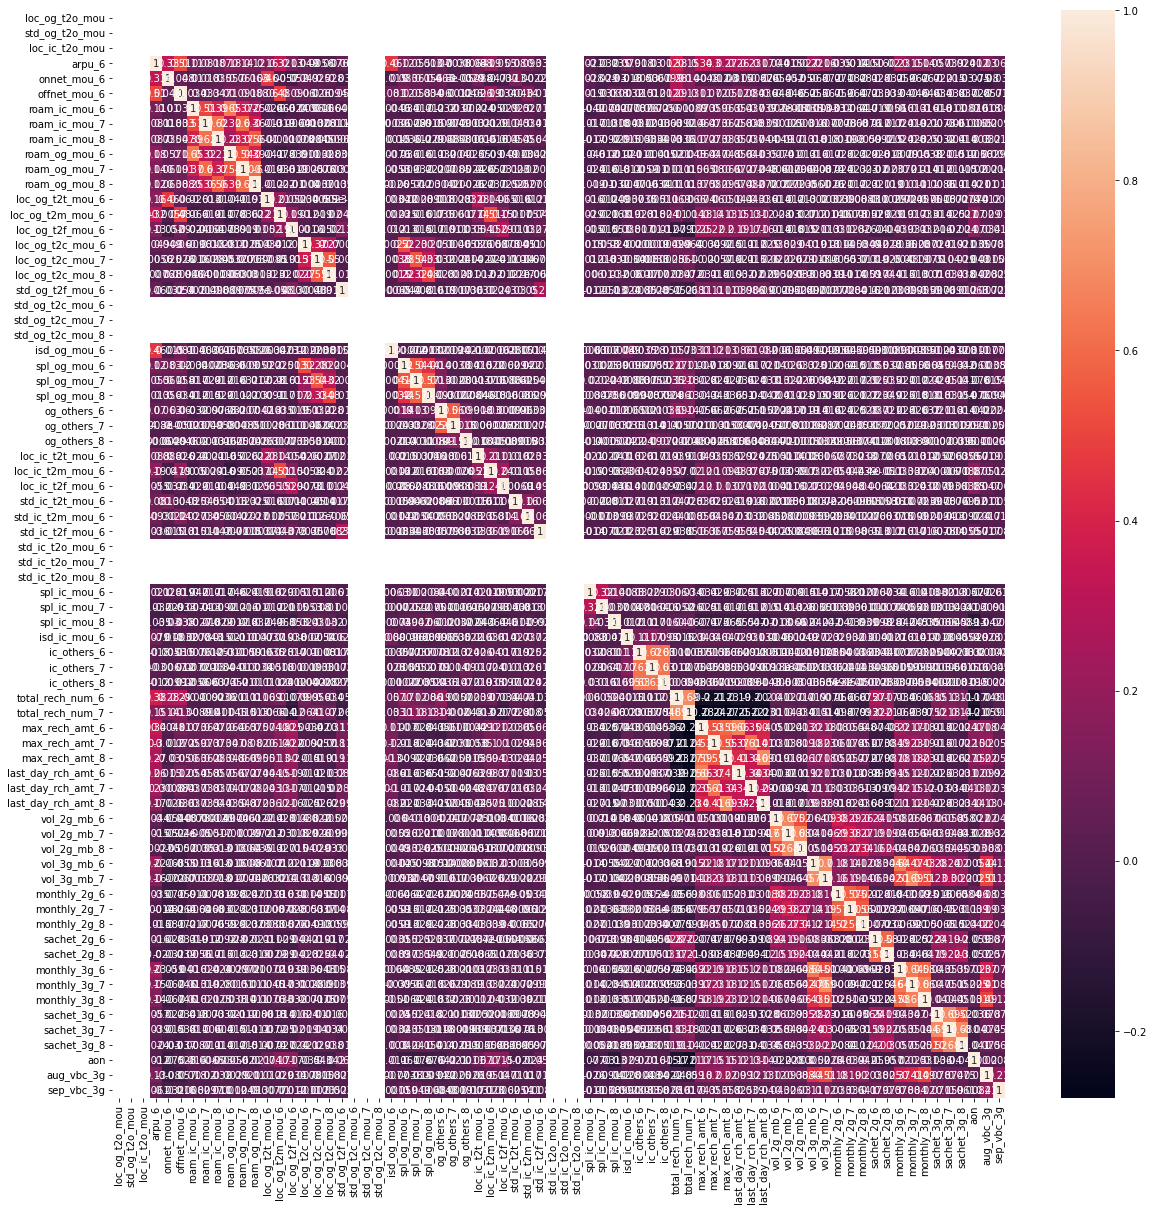

In [82]:
plt.rcParams["figure.figsize"]= (20,20)
sns.heatmap(X.corr(), annot= True)

In [2]:
#deleting the columns responsible for missing values in the heatmap above
X.drop(["loc_og_t2o_mou","loc_ic_t2o_mou","std_og_t2o_mou","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8", "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8"], axis=1, inplace= True)

NameError: name 'X' is not defined

<AxesSubplot:>

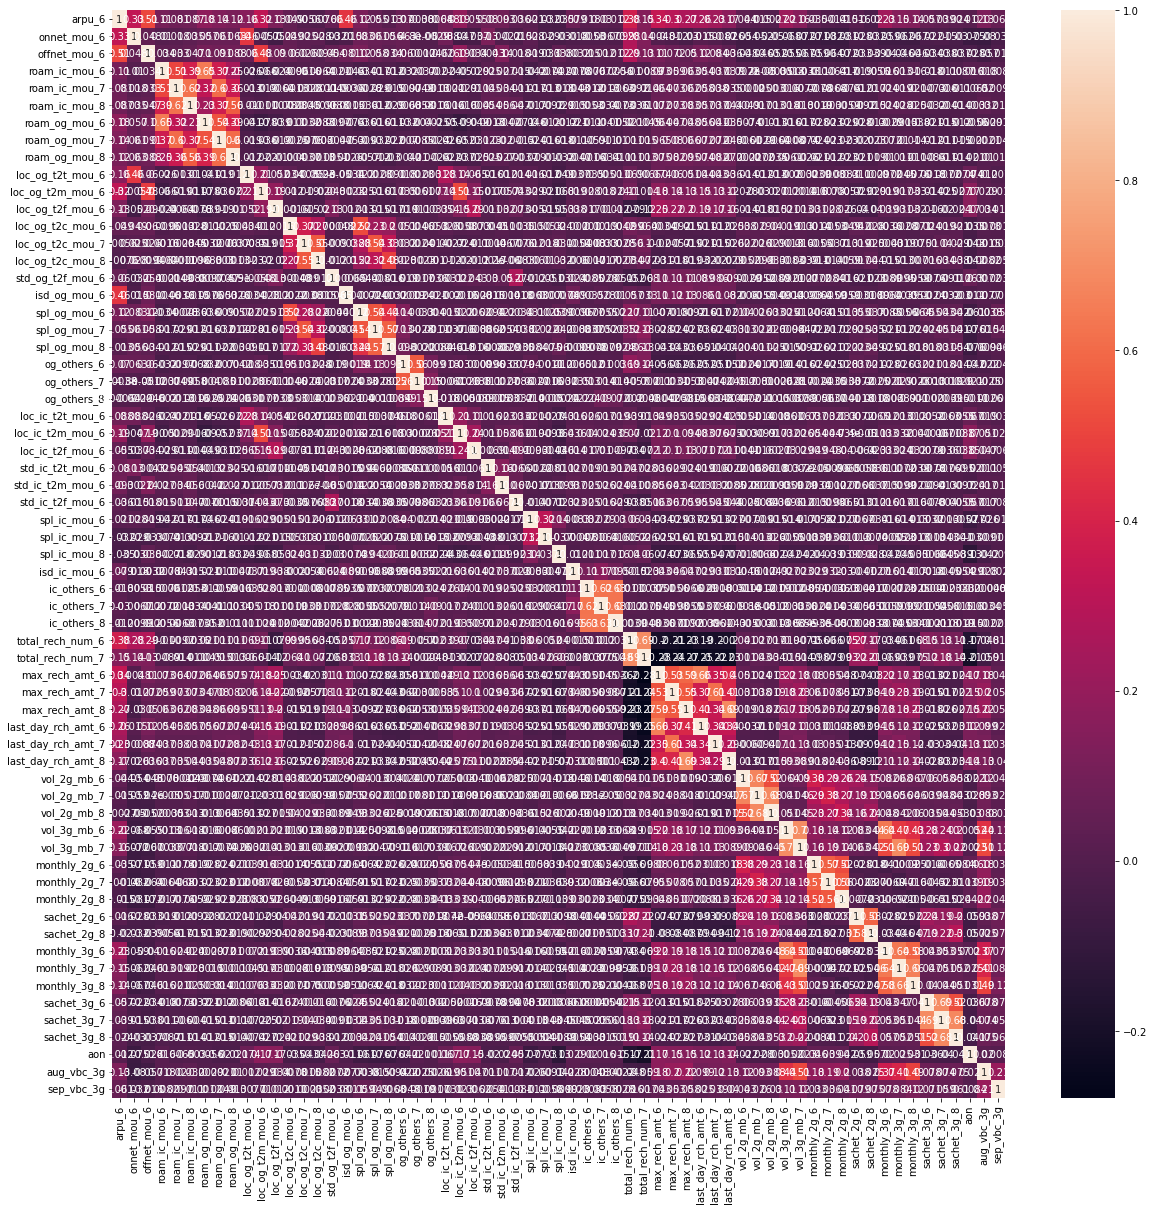

In [84]:
sns.heatmap(X.corr(), annot= True)

In [85]:
len(X.columns)

63

#### Splitting the dataset into train and test

### First model

In [86]:
X_train, X_test, y_train , y_test= train_test_split(X, y, train_size= 0.7, random_state=100)

In [87]:
print(X_train.shape ,X_test.shape, y_train.shape, y_test.shape)

(21543, 63) (9234, 63) (21543,) (9234,)


In [88]:
X_train_sm= sm.add_constant(X_train)
log_ml1= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
log_ml1= log_ml1.fit()
log_ml1.summary()

D:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
D:\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
D:\anaconda\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21543
Model:                            GLM   Df Residuals:                    21479
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 30 Nov 2022   Deviance:                       3415.5
Time:                        23:20:12   Pearson chi2:                 5.03e+04
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0618      0.147    -20.822      0.000      -3.350      -2.774
arpu_6                 0.0005      0.000      2.461      0.014       0.000       0.001
onnet_mou_6            0.0006      0.000      5.876      0.000       0.000       0.001
offnet_mou_6           0.0006      0.000      5.555      0.000       0.000       0.001
roam_ic_mou_6          0.0009      0.001      1.357      0.175      -0.000       0.002
roam_ic_mou_7          0.0006      0.001      0.973      0.330      -0.001       0.002
roam_ic_mou_8          0.0018      0.000      3.651      0.000       0.001       0.003
roam_og_mou_6         -0.0006      0.000     -1.626      0.104      -0.001       0.000
roam_og_mou_7          0.0011      0.000      2.434      0.015       0.000       0.002
roam_og_mou_8          0.0017      0.000      5.403      0.000       0.001       0.002
loc_og_t2t_mou_6      -0.0005      0.000     -1.794      0.073      -0.001     4.6e-05
loc_og_t2m_mou_6      -0.0030      0.001     -5.794      0.000      -0.004      -0.002
loc_og_t2f_mou_6      -0.0085      0.008     -1.122      0.262      -0.023       0.006
loc_og_t2c_mou_6      -0.0124      0.012     -1.062      0.288      -0.035       0.011
loc_og_t2c_mou_7      -0.0009      0.007     -0.122      0.903      -0.015       0.013
loc_og_t2c_mou_8       0.0524      0.012      4.377      0.000       0.029       0.076
std_og_t2f_mou_6      -0.0003      0.005     -0.068      0.946      -0.009       0.009
isd_og_mou_6          -0.0009      0.001     -0.644      0.520      -0.004       0.002
spl_og_mou_6          -0.0009      0.004     -0.208      0.835      -0.009       0.007
spl_og_mou_7           0.0099      0.004      2.824      0.005       0.003       0.017
spl_og_mou_8          -0.0622      0.009     -6.591      0.000      -0.081      -0.044
og_others_6            0.0410      0.022      1.859      0.063      -0.002       0.084
og_others_7           -0.7972      1.892     -0.421      0.673      -4.505       2.910
og_others_8        -1353.5443   1.43e+05     -0.009      0.992   -2.82e+05    2.79e+05
loc_ic_t2t_mou_6      -0.0011      0.001     -1.335      0.182      -0.003       0.000
loc_ic_t2m_mou_6   -5.289e-05      0.000     -0.114      0.909      -0.001       0.001
loc_ic_t2f_mou_6      -0.0139      0.005     -2.836      0.005      -0.024      -0.004
std_ic_t2t_mou_6       0.0007      0.001      1.325      0.185      -0.000       0.002
std_ic_t2m_mou_6      -0.0002      0.001     -0.326      0.745      -0.001       0.001
std_ic_t2f_mou_6      -0.0044      0.004     -1.064      0.287      -0.012       0.004
spl_ic_mou_6           0.4727      0.291      1.622      0.105      -0.098       1.044
spl_ic_mou_7          -0.2462      0.446     -0.552      0.581      -1.121       0.629
spl_ic_mou_8          -5.5534      1.3

### Using RFE for feature elimination 

In [89]:
logreg= LogisticRegression()
rfe= RFE(logreg, 25)
rfe.fit(X_train, y_train)
rfe.support_

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_i

array([False, False, False, False, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False])

In [90]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('arpu_6', False, 3),
 ('onnet_mou_6', False, 15),
 ('offnet_mou_6', False, 16),
 ('roam_ic_mou_6', False, 10),
 ('roam_ic_mou_7', False, 26),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 5),
 ('roam_og_mou_7', False, 4),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 17),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', True, 1),
 ('loc_og_t2c_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 37),
 ('isd_og_mou_6', True, 1),
 ('spl_og_mou_6', False, 14),
 ('spl_og_mou_7', True, 1),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 39),
 ('og_others_7', False, 29),
 ('og_others_8', False, 11),
 ('loc_ic_t2t_mou_6', True, 1),
 ('loc_ic_t2m_mou_6', False, 6),
 ('loc_ic_t2f_mou_6', True, 1),
 ('std_ic_t2t_mou_6', False, 22),
 ('std_ic_t2m_mou_6', False, 20),
 ('std_ic_t2f_mou_6', True, 1),
 ('spl_ic_mou_6', False, 19),
 ('spl_ic_mou_7', False, 27),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_6', True, 

In [91]:
cols= X_train.columns[rfe.support_]
cols

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'isd_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2f_mou_6',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'sachet_2g_8',
       'sachet_3g_8'],
      dtype='object')

In [92]:
X_train_new= X_train[cols]
X_test_new = X_test[cols]

In [93]:
print(X_train_new.shape)
X_train_new.head()

(21543, 25)


roam_ic_mou_8  roam_og_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
8172            0.00           0.00              0.00              0.00   
16873           0.00           0.00             61.39              1.31   
12722           0.00           0.00              0.18              0.00   
3951            0.00           0.00             28.96              9.33   
4517            8.05           0.91             57.76              0.00   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  isd_og_mou_6  \
8172                0.0               0.0              0.00           0.0   
16873               0.0               0.0              0.00           0.0   
12722               0.0               0.0              0.00           0.0   
3951                0.0               0.0              0.00           0.0   
4517                0.0               0.0              2.48           0.0   

       spl_og_mou_7  spl_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2f_mou_6  \
8172           1.03          2.34              0.00              0.00   
16873          0.00          0.00            108.64              0.00   
12722          0.00          0.00             83.59              0.00   
3951           0.00          0.00              0.64              1.09   
4517           0.00          3.26              3.03              0.00   

       std_ic_t2f_mou_6  spl_ic_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  \
8172               0.00          0.25          0.00          0.0         0.00   
16873              0.00          0.00          0.00          0.0         0.06   
12722              0.00          0.00          0.00          0.0         0.00   
3951              36.88          0.00        496.34          0.0         0.05   
4517               0.00          0.86          0.00          0.0         0.00   

       ic_others_8  total_rech_num_7  max_rech_amt_6  max_rech_amt_8  \
8172           0.0                16               0             144   
16873          0.0                11             154             154   
12722          0.0                14              50              50   
3951           0.0                 9             154             198   
4517           0.0                21              30              50   

       last_day_rch_amt_7  last_day_rch_amt_8  sachet_2g_8  sachet_3g_8  
8172                   10                  36            0            0  
16873                 100                 130            0            0  
12722                  20                  30            0            0  
3951                   50                   0            0            0  
4517                   20                  30            0            0

In [94]:
print(X_test_new.shape)
X_test_new.head()

(9234, 25)


roam_ic_mou_8  roam_og_mou_8  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
124             0.00           0.00            157.28              0.00   
789             8.46          22.81              0.00              0.00   
21860           0.00           0.00             15.21              0.35   
26203           0.00           0.00            103.33              0.00   
26840           0.00           0.00             20.33              0.00   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  isd_og_mou_6  \
124                0.00              0.00             10.33           0.0   
789                0.00              0.00              0.00           0.0   
21860              0.24              0.26              0.00           0.0   
26203              0.00             40.26              0.00           0.0   
26840              2.18              0.00              0.00           0.0   

       spl_og_mou_7  spl_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2f_mou_6  \
124           26.28         23.59             17.33              5.79   
789            0.00          0.75              0.00              0.00   
21860          0.26          0.53              7.48              0.00   
26203         50.26          0.00             31.29              1.28   
26840          0.11          0.00              4.86              1.46   

       std_ic_t2f_mou_6  spl_ic_mou_8  isd_ic_mou_6  ic_others_6  ic_others_7  \
124                 0.0           0.0          0.03         0.00          0.0   
789                 0.0           0.0          0.00         0.00          0.0   
21860               0.0           0.0          0.00         0.00          0.0   
26203               0.0           0.0          0.00         0.38          0.0   
26840               0.0           0.0          3.49         0.00          0.0   

       ic_others_8  total_rech_num_7  max_rech_amt_6  max_rech_amt_8  \
124           9.98                 5             120             130   
789           0.00                 2             110             130   
21860         0.00                 9             110             130   
26203         0.00                 8              50              30   
26840         0.00                19             100              50   

       last_day_rch_amt_7  last_day_rch_amt_8  sachet_2g_8  sachet_3g_8  
124                   110                 130            0            0  
789                    50                 130            0            0  
21860                 110                 130            0            0  
26203                  20                  20            0            0  
26840                  30                  50            0            0

### Model 2 

In [95]:
logml2= sm.GLM(y_train, X_train_new, family= sm.families.Binomial())
logml2= logml2.fit()
logml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21543
Model:                            GLM   Df Residuals:                    21518
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.1
Date:                Wed, 30 Nov 2022   Deviance:                       4166.2
Time:                        23:20:33   Pearson chi2:                 4.50e+15
No. Iterations:                    11   Pseudo R-squ. (CS):            0.01304
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
roam_ic_mou_8          0.0029      0.000      6.903      0.000       0.002       0.004
roam_og_mou_8          0.0027      0.000      9.169      0.000       0.002       0.003
loc_og_t2m_mou_6      -0.0040      0.001     -7.337      0.000      -0.005      -0.003
loc_og_t2f_mou_6      -0.0135      0.009     -1.514      0.130      -0.031       0.004
loc_og_t2c_mou_6      -0.0157      0.012     -1.313      0.189      -0.039       0.008
loc_og_t2c_mou_7      -0.0085      0.010     -0.813      0.416      -0.029       0.012
loc_og_t2c_mou_8       0.0501      0.014      3.665      0.000       0.023       0.077
isd_og_mou_6           0.0028      0.001      2.300      0.021       0.000       0.005
spl_og_mou_7           0.0188      0.003      5.947      0.000       0.013       0.025
spl_og_mou_8          -0.0711      0.009     -7.609      0.000      -0.089      -0.053
loc_ic_t2t_mou_6      -0.0029      0.001     -3.163      0.002      -0.005      -0.001
loc_ic_t2f_mou_6      -0.0250      0.006     -4.462      0.000      -0.036      -0.014
std_ic_t2f_mou_6      -0.0084      0.004     -1.990      0.047      -0.017      -0.000
spl_ic_mou_8          -6.6016      1.330     -4.963      0.000      -9.208      -3.995
isd_ic_mou_6          -0.0036      0.003     -1.330      0.184      -0.009       0.002
ic_others_6            0.0057      0.015      0.383      0.702      -0.023       0.035
ic_others_7           -0.0011      0.011     -0.094      0.925      -0.023       0.021
ic_others_8           -0.2678      0.083     -3.234      0.001      -0.430      -0.105
total_rech_num_7      -0.0744      0.005    -14.440      0.000      -0.084      -0.064
max_rech_amt_6        -0.0014      0.000     -3.206      0.001      -0.002      -0.001
max_rech_amt_8        -0.0084      0.001    -11.559      0.000      -0.010      -0.007
last_day_rch_amt_7    -0.0025      0.001     -3.766      0.000      -0.004      -0.001
last_day_rch_amt_8    -0.0049      0.001     -5.705      0.000      -0.007      -0.003
sachet_2g_8           -0.2557      0.054     -4.749      0.000      -0.361      -0.150
sachet_3g_8           -0.0661      0.095     -0.699      0.485      -0.252       0.119
======================================================================================
"""

In [96]:
y_train_pred=logml2.predict(X_train_new) 

In [97]:
y_train_pred.head(20)

8172     0.012148
16873    0.021915
12722    0.122050
3951     0.006462
4517     0.000268
6812     0.082490
9049     0.002244
18114    0.048610
15862    0.081678
25986    0.152111
20126    0.110322
21789    0.021314
11413    0.014093
17978    0.007956
21850    0.064309
6588     0.001267
22656    0.006424
21982    0.007263
25888    0.013615
3476     0.000147
dtype: float64

In [98]:
y_train_pred_final= pd.DataFrame({"Churn": y_train.values, "Churn_probability": y_train_pred})
y_train_pred_final["CustID"]= y_train.index
y_train_pred_final.head()

Churn  Churn_probability  CustID
8172       0           0.012148    8172
16873      0           0.021915   16873
12722      0           0.122050   12722
3951       0           0.006462    3951
4517       0           0.000268    4517

In [99]:
y_train_pred_final["predicted"]= y_train_pred_final["Churn_probability"].map(lambda x : 1 if x> 0.5 else 0)

In [100]:
y_train_pred_final.head()

Churn  Churn_probability  CustID  predicted
8172       0           0.012148    8172          0
16873      0           0.021915   16873          0
12722      0           0.122050   12722          0
3951       0           0.006462    3951          0
4517       0           0.000268    4517          0

In [101]:
accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.9777653994336908

In [102]:
#confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])
confusion

array([[21048,    35],
       [  444,    16]], dtype=int64)

### feature eliination using variance inflation factor 

In [103]:
vif= pd.DataFrame()
vif["Features"]= X_train_new.columns
vif["VIF"]= [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]

In [104]:
vif

Features       VIF
0        roam_ic_mou_8  1.501375
1        roam_og_mou_8  1.528337
2     loc_og_t2m_mou_6  1.622907
3     loc_og_t2f_mou_6  1.302753
4     loc_og_t2c_mou_6  1.279168
5     loc_og_t2c_mou_7  2.185008
6     loc_og_t2c_mou_8  1.843449
7         isd_og_mou_6  1.018452
8         spl_og_mou_7  2.177542
9         spl_og_mou_8  1.960125
10    loc_ic_t2t_mou_6  1.197713
11    loc_ic_t2f_mou_6  1.245216
12    std_ic_t2f_mou_6  1.038507
13        spl_ic_mou_8  1.071775
14        isd_ic_mou_6  1.057327
15         ic_others_6  2.261922
16         ic_others_7  2.040384
17         ic_others_8  2.280436
18    total_rech_num_7  1.777639
19      max_rech_amt_6  3.174006
20      max_rech_amt_8  4.808413
21  last_day_rch_amt_7  1.871933
22  last_day_rch_amt_8  2.843890
23         sachet_2g_8  1.264200
24         sachet_3g_8  1.122104

In [105]:
X_train_new= X_train_new.drop("max_rech_amt_8", axis= 1)
X_test_new= X_test_new.drop("max_rech_amt_8", axis = 1)

### Model 3 

In [106]:
logml3= sm.GLM(y_train , X_train_new , family= sm.families.Binomial())
logml3= logml3.fit()
logml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21543
Model:                            GLM   Df Residuals:                    21519
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2168.7
Date:                Wed, 30 Nov 2022   Deviance:                       4337.4
Time:                        23:20:35   Pearson chi2:                 4.50e+15
No. Iterations:                    11   Pseudo R-squ. (CS):           0.005162
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
roam_ic_mou_8          0.0026      0.000      6.162      0.000       0.002       0.003
roam_og_mou_8          0.0025      0.000      8.418      0.000       0.002       0.003
loc_og_t2m_mou_6      -0.0042      0.001     -7.390      0.000      -0.005      -0.003
loc_og_t2f_mou_6      -0.0191      0.010     -1.987      0.047      -0.038      -0.000
loc_og_t2c_mou_6      -0.0131      0.012     -1.117      0.264      -0.036       0.010
loc_og_t2c_mou_7      -0.0101      0.010     -1.012      0.311      -0.030       0.009
loc_og_t2c_mou_8       0.0492      0.014      3.465      0.001       0.021       0.077
isd_og_mou_6           0.0029      0.001      2.344      0.019       0.000       0.005
spl_og_mou_7           0.0191      0.003      7.069      0.000       0.014       0.024
spl_og_mou_8          -0.0803      0.010     -8.371      0.000      -0.099      -0.061
loc_ic_t2t_mou_6      -0.0031      0.001     -3.322      0.001      -0.005      -0.001
loc_ic_t2f_mou_6      -0.0290      0.006     -4.973      0.000      -0.040      -0.018
std_ic_t2f_mou_6      -0.0077      0.005     -1.524      0.127      -0.018       0.002
spl_ic_mou_8          -7.1585      1.364     -5.249      0.000      -9.831      -4.486
isd_ic_mou_6          -0.0043      0.003     -1.537      0.124      -0.010       0.001
ic_others_6            0.0087      0.015      0.593      0.553      -0.020       0.038
ic_others_7           -0.0016      0.012     -0.141      0.888      -0.024       0.021
ic_others_8           -0.3103      0.086     -3.602      0.000      -0.479      -0.141
total_rech_num_7      -0.0841      0.005    -15.783      0.000      -0.095      -0.074
max_rech_amt_6        -0.0046      0.001     -8.756      0.000      -0.006      -0.004
last_day_rch_amt_7    -0.0047      0.001     -6.743      0.000      -0.006      -0.003
last_day_rch_amt_8    -0.0088      0.001    -12.421      0.000      -0.010      -0.007
sachet_2g_8           -0.3039      0.056     -5.429      0.000      -0.414      -0.194
sachet_3g_8           -0.0910      0.099     -0.918      0.359      -0.285       0.103
======================================================================================
"""

In [107]:
X_train_new.drop(["loc_og_t2c_mou_6","loc_og_t2c_mou_7","sachet_3g_8", "ic_others_7","ic_others_6"], axis= 1, inplace= True)
X_test_new.drop(["loc_og_t2c_mou_6","loc_og_t2c_mou_7","sachet_3g_8", "ic_others_7","ic_others_6"], axis= 1, inplace= True)


### Model 4

In [108]:
logml4= sm.GLM(y_train, X_train_new, family= sm.families.Binomial())
logml4= logml4.fit()
logml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21543
Model:                            GLM   Df Residuals:                    21524
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2171.7
Date:                Wed, 30 Nov 2022   Deviance:                       4343.4
Time:                        23:20:35   Pearson chi2:                 4.50e+15
No. Iterations:                    11   Pseudo R-squ. (CS):           0.004885
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
roam_ic_mou_8          0.0026      0.000      6.119      0.000       0.002       0.003
roam_og_mou_8          0.0025      0.000      8.429      0.000       0.002       0.003
loc_og_t2m_mou_6      -0.0041      0.001     -7.362      0.000      -0.005      -0.003
loc_og_t2f_mou_6      -0.0194      0.010     -2.014      0.044      -0.038      -0.001
loc_og_t2c_mou_8       0.0399      0.014      2.940      0.003       0.013       0.067
isd_og_mou_6           0.0029      0.001      2.313      0.021       0.000       0.005
spl_og_mou_7           0.0155      0.002      6.903      0.000       0.011       0.020
spl_og_mou_8          -0.0778      0.009     -8.203      0.000      -0.096      -0.059
loc_ic_t2t_mou_6      -0.0031      0.001     -3.328      0.001      -0.005      -0.001
loc_ic_t2f_mou_6      -0.0283      0.006     -4.915      0.000      -0.040      -0.017
std_ic_t2f_mou_6      -0.0076      0.005     -1.501      0.133      -0.018       0.002
spl_ic_mou_8          -7.1816      1.367     -5.253      0.000      -9.861      -4.502
isd_ic_mou_6          -0.0041      0.003     -1.529      0.126      -0.009       0.001
ic_others_8           -0.3122      0.086     -3.611      0.000      -0.482      -0.143
total_rech_num_7      -0.0852      0.005    -15.860      0.000      -0.096      -0.075
max_rech_amt_6        -0.0046      0.001     -8.849      0.000      -0.006      -0.004
last_day_rch_amt_7    -0.0047      0.001     -6.732      0.000      -0.006      -0.003
last_day_rch_amt_8    -0.0087      0.001    -12.304      0.000      -0.010      -0.007
sachet_2g_8           -0.3107      0.056     -5.574      0.000      -0.420      -0.201
======================================================================================
"""

In [109]:
y_train_pred4= logml4.predict(X_train_new)

In [110]:
y_train_pred4.head(20)

8172     0.024457
16873    0.020473
12722    0.115097
3951     0.012473
4517     0.000145
6812     0.063429
9049     0.003566
18114    0.043302
15862    0.075659
25986    0.170689
20126    0.065681
21789    0.028478
11413    0.008669
17978    0.006703
21850    0.075098
6588     0.000979
22656    0.006528
21982    0.027578
25888    0.040052
3476     0.000067
dtype: float64

In [111]:
y_train_pred_final= pd.DataFrame({"Churn": y_train.values, "Churn_probability": y_train_pred4})
y_train_pred_final["CustID"]= y_train.index
y_train_pred_final.head()

Churn  Churn_probability  CustID
8172       0           0.024457    8172
16873      0           0.020473   16873
12722      0           0.115097   12722
3951       0           0.012473    3951
4517       0           0.000145    4517

In [112]:
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Churn_probability"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()
    
    

Churn  Churn_probability  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
8172       0           0.024457    8172    1    0    0    0    0    0    0   
16873      0           0.020473   16873    1    0    0    0    0    0    0   
12722      0           0.115097   12722    1    1    0    0    0    0    0   
3951       0           0.012473    3951    1    0    0    0    0    0    0   
4517       0           0.000145    4517    1    0    0    0    0    0    0   

       0.7  0.8  0.9  
8172     0    0    0  
16873    0    0    0  
12722    0    0    0  
3951     0    0    0  
4517     0    0    0

In [113]:
#creating dataframe for different cutoff and metrics

cutoff_df= pd.DataFrame(columns=["prob", "accuracy", "sensitivity", "specificity"])

num= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy= (cm1[0,0]+ cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.021353     1.000000     0.000000
0.1   0.1  0.919695     0.341304     0.932315
0.2   0.2  0.965697     0.134783     0.983826
0.3   0.3  0.974980     0.073913     0.994640
0.4   0.4  0.977301     0.056522     0.997391
0.5   0.5  0.977765     0.036957     0.998292
0.6   0.6  0.978090     0.028261     0.998814
0.7   0.7  0.978090     0.013043     0.999146
0.8   0.8  0.978322     0.013043     0.999383
0.9   0.9  0.978369     0.006522     0.999573


<AxesSubplot:xlabel='prob'>

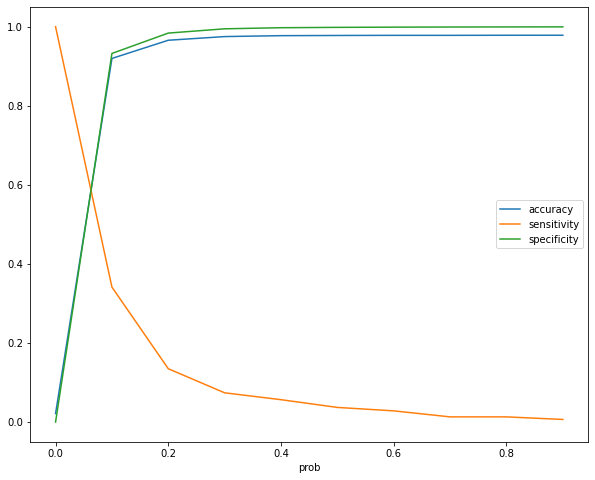

In [114]:
plt.rcParams["figure.figsize"]= (10, 8)
cutoff_df.plot.line( x="prob", y=["accuracy", "sensitivity", "specificity" ])

In [115]:
y_train_pred_final["predicted"]= y_train_pred_final["Churn_probability"].map(lambda x: 1 if x > 0.08 else 0)

In [116]:
y_train_pred_final

Churn  Churn_probability  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
8172       0       2.445662e-02    8172    1    0    0    0    0    0    0   
16873      0       2.047338e-02   16873    1    0    0    0    0    0    0   
12722      0       1.150970e-01   12722    1    1    0    0    0    0    0   
3951       0       1.247284e-02    3951    1    0    0    0    0    0    0   
4517       0       1.450448e-04    4517    1    0    0    0    0    0    0   
...      ...                ...     ...  ...  ...  ...  ...  ...  ...  ...   
12119      0       1.066410e-07   12119    1    0    0    0    0    0    0   
24423      0       3.479536e-03   24423    1    0    0    0    0    0    0   
14147      0       1.181691e-05   14147    1    0    0    0    0    0    0   
23320      0       1.086133e-03   23320    1    0    0    0    0    0    0   
5640       0       4.673357e-03    5640    1    0    0    0    0    0    0   

       0.7  0.8  0.9  predicted  
8172     0    0    0          0  
16873    0    0    0          0  
12722    0    0    0          1  
3951     0    0    0          0  
4517     0    0    0          0  
...    ...  ...  ...        ...  
12119    0    0    0          0  
24423    0    0    0          0  
14147    0    0    0          0  
23320    0    0    0          0  
5640     0    0    0          0  

[21543 rows x 14 columns]

In [117]:
confusion= confusion_matrix(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

In [118]:
accuracy_score(y_train_pred_final["Churn"], y_train_pred_final["predicted"])

0.8939330641043495

In [119]:
TP= confusion[1,1] #true positive
TN= confusion[0,0] # true negative
FP= confusion[0,1] # false positive
FN= confusion[1,0] # false negatives

In [120]:
#sensitivity
TP/(TP+FN)

0.42391304347826086

In [121]:
#specificity
TN/(TN+FP)

0.9041882085092254

In [122]:
#calculate the false positives 
FP/(TN/FP)

214.048156113938

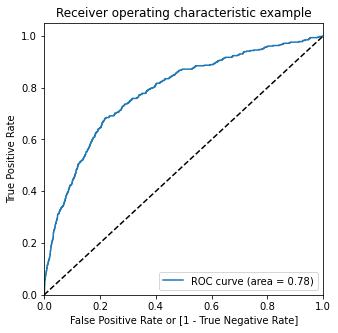

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_probability)

In [124]:
precision= confusion[1,1]/(confusion[1,1]+ confusion[0,1])
precision

0.08803611738148984

In [125]:
recall= confusion[1,1]/ (confusion[1,1]+confusion[1,0])
recall

0.42391304347826086

In [126]:
y_test_pred= logml4.predict(X_test_new)

In [127]:
y_test_pred.head(20)

124      4.853957e-04
789      1.163850e-01
21860    4.500670e-02
26203    2.762486e-01
26840    5.687006e-02
21500    8.675993e-03
24857    4.680173e-02
15409    2.562349e-04
1952     5.426699e-01
2952     4.275783e-02
8510     8.649133e-03
19616    3.800329e-02
15543    2.993429e-04
20471    6.664632e-02
13514    1.228120e-01
27189    7.984612e-02
9223     8.650782e-08
16784    1.095508e-01
6223     1.436055e-04
1575     1.315318e-03
dtype: float64

In [128]:
y_test_pred_final= pd.DataFrame({"Churn": y_test.values, "Churn_probability": y_test_pred})
y_test_pred_final["CustID"]= y_test.index
y_test_pred_final.head()

Churn  Churn_probability  CustID
124        0           0.000485     124
789        0           0.116385     789
21860      0           0.045007   21860
26203      0           0.276249   26203
26840      0           0.056870   26840

In [129]:
y_test_pred_final["predicted"]= y_test_pred_final["Churn_probability"].map(lambda x: 1 if x > 0.08 else 0)

In [130]:
y_test_pred_final.head()

Churn  Churn_probability  CustID  predicted
124        0           0.000485     124          0
789        0           0.116385     789          1
21860      0           0.045007   21860          0
26203      0           0.276249   26203          1
26840      0           0.056870   26840          0

In [131]:
accuracy_score(y_test_pred_final["Churn"], y_test_pred_final["predicted"])

0.8934372969460689

In [132]:
precision_score(y_test_pred_final["Churn"], y_test_pred_final["predicted"])

0.0708245243128964

In [133]:
confusion_matrix(y_test_pred_final["Churn"], y_test_pred_final["predicted"])

array([[8183,  879],
       [ 105,   67]], dtype=int64)

In [134]:
recall_score(y_test_pred_final["Churn"], y_test_pred_final["predicted"])

0.38953488372093026